In [87]:
# preamble

import matplotlib.pyplot as plt
import numpy as np
e = np.e
pi = np.pi

## ATP1 (30/8)

In [88]:
# generic functions

def derivative(func, x):

    h = 1e-10

    return (func(x + h) - func(x))/h

def calculate_L(func, min_interval, max_interval):

    interval = [min_interval, max_interval]
    max_derivative = max(abs(derivative(func, x)) for x in interval)

    return max_derivative

def calculate_m(func, min_interval, max_interval):

    interval = [min_interval, max_interval]
    min_derivative = min(abs(derivative(func, x)) for x in interval)

    return min_derivative

In [89]:
# fixed point method

def fixed_point(func, 
                min_interval, 
                max_interval, 
                delta, 
                max_iterations):
    ''' 
    initial guess is (min_interval+max_interval)/2
    '''
    x = (min_interval+max_interval)/2
    L = calculate_L(func, min_interval, max_interval)
    eps = ((1 - L)/L)*delta

    for i in range(1, max_iterations):
        x_next = func(x)
        if abs(x_next - x) < eps:
            return x_next, i
        x = x_next
        
    return x, -1

In [90]:
# newton's method

def newton(g, 
            dg, 
            min_interval, 
            max_interval, 
            delta, 
            max_iterations):
    ''' 
    initial guess is (min_interval+max_interval)/2
    '''
    x = (min_interval+max_interval)/2
    m = calculate_m(g, min_interval, max_interval)
    M = calculate_L(dg, min_interval, max_interval)
    eps = np.sqrt(((2*m)/M)*delta)

    for i in range(1, max_iterations):
        x_next = x-g(x)/dg(x)
        if abs(x_next - x) < eps:
            return x_next, i
        x = x_next
        
    return x, -1

### Question 1

In [91]:
# question function

def f(x):
    return x*e**(x/2)-1.2*x-5

def df(x):
    return e**(x/2)+(x/2)*e**(x/2)-1.2

# iteration functions

def phi_a(x):
    return 5/(e**(x/2)-1.2)

def phi_b(x):
    return (1.2*x+5)/(e**(x/2))

def phi_c(x):
    return x*(e**(x/2)-0.2)-5

In [92]:
# test parameters for phi_b

min_interval = 2.1
max_interval = 4
delta = 5*10**(-4)
max_iterations = 10000

In [93]:
# phi_b satisfies fixed_point condition and L condition

L = calculate_L(phi_b, min_interval, max_interval)
m = min(phi_b(x) for x in [min_interval,max_interval])
M = max(phi_b(x) for x in [min_interval,max_interval])

L, m, M

(0.8958389585700388, 1.3262857757188047, 2.631531873315888)

In [94]:
# root with fixed point method

root, i = fixed_point(func=phi_b, 
                      min_interval=min_interval, 
                      max_interval=max_interval, 
                      delta=delta, 
                      max_iterations=max_iterations)

print(f"The root {root} was found with {i} iterations.")

The root 2.38547025216842 was found with 53 iterations.


In [95]:
# root with newton's method

root, i = newton(g=f, 
                 dg=df, 
                 min_interval=min_interval, 
                 max_interval=max_interval, 
                 delta=delta, 
                 max_iterations=max_iterations)

print(f"The root {root} was found with {i} iterations.")

The root 2.3854827235536455 was found with 2 iterations.


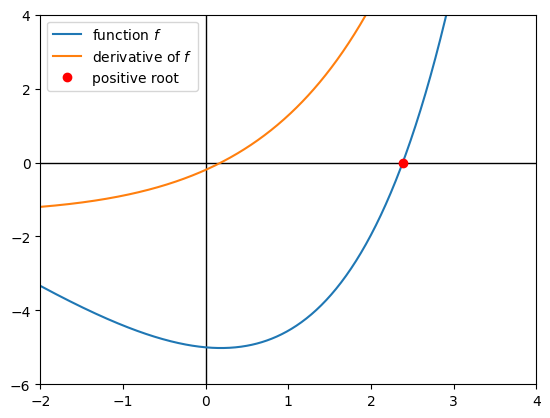

In [96]:
# plot question 1

x = np.arange(-2, 3.5, 0.01)
y = [f(x) for x in x]

df = [derivative(f, x) for x in x]

plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

ax = plt.gca()
ax.plot(x, y, label=r'function $f$')
ax.plot(x, df, label=r'derivative of $f$')
plt.plot(root, 0, 'ro', label='positive root')
plt.xlim(-2, 4)
plt.ylim(-6, 4)
ax.legend()
plt.show()